In [1]:
import nltk, collections
import numpy as np
from nltk.collocations import *
from nltk.corpus import stopwords
import subprocess
import pandas as pd
import re
from sklearn.externals import joblib
import random

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import candidate_list_gen
import dataframe_generation
import Classifier

In [2]:
import preprocessing
# This reads the *.tex sources and dumps them to a file
preprocessing.dump_detex_data()
feature_list_from_tex = ["indices","sections","subsections","large","underline","italicized","bold"]

Processed 88 source files and dumped data


In [3]:
feature_dict = preprocessing.populate_properties()

In [4]:
df = pd.DataFrame([])
for filename in feature_dict:
    feature_dict[filename]["candidate_list"] = candidate_list_gen.process_text(feature_dict[filename]["plaintext"])
    df = df.append(dataframe_generation.generate_dataframe(filename,feature_dict[filename],feature_list_from_tex))

In [10]:
test_files = ["dataset/discover_physics/ch02/ch02.tex","dataset/discover_physics/ch04/ch04.tex","dataset/general_relativity/ch03/ch03.rbtex","dataset/general_relativity/ch05/ch05.rbtex"]

df_test = pd.DataFrame([])
df_train = pd.DataFrame([])

df_test = df.loc[df.filename.isin(test_files),]
df_test = df_test.append([df_test[df_test.indices==1]])
print(df_test.shape)
print(df_test[df_test.indices==1].shape)
df_test.to_csv("test.csv")

df_train = df.loc[~df.filename.isin(test_files),]
df_train = df_train.append([df_train[df_train.indices==1]]*100)
print(df_train.shape)
print(df_train[df_train.indices==1].shape)
df_train.to_csv("training.csv")


(8234, 27)
(126, 27)
(183638, 27)
(81002, 27)


TP, FP, TN, FN   : 4 87 8021 122
The index words generated by the model are
[0 0 0 ..., 0 0 0] 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8204    1
8205    1
8206    1
8207    1
8208    1
8209    1
8210    1
8211    1
8212    1
8213    1
8214    1
8215    1
8216    1
8217    1
8218    1
8219    1
8220    1
8221    1
8222    1
8223    1
8224    1
8225    1
8226    1
8227    1
8228    1
8229    1
8230    1
8231    1
8232    1
8233    1
Name: indices, Length: 8234, dtype: int64
Accuracy score is  97.4617439883
Root Mean Squared Error: 0.1593190513296817
Mean absolute error: 0.0253825601166
Micro stats:
(0.97461743988341021, 0.97461743988341021, 0.97461743988341032, None)
Macro stats:
(0.5144869253305947, 0.51050794433872881, 0

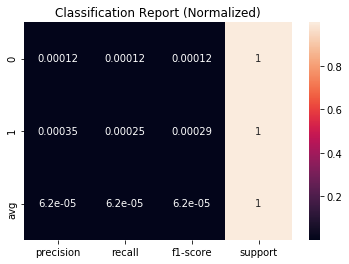

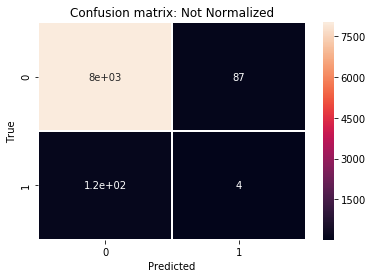

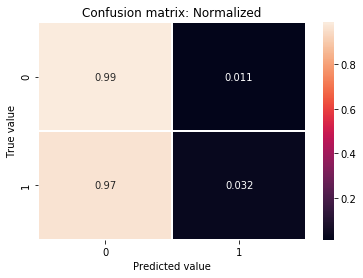

In [11]:
Classifier.classifier("training.csv","test.csv")